C:\Users\mmare\New folder\New folder\envs\MSE110\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving SummaryDoc documents: 100%|████████████████████████████████████████████████| 8/8 [00:00<00:00, 50686.45it/s]


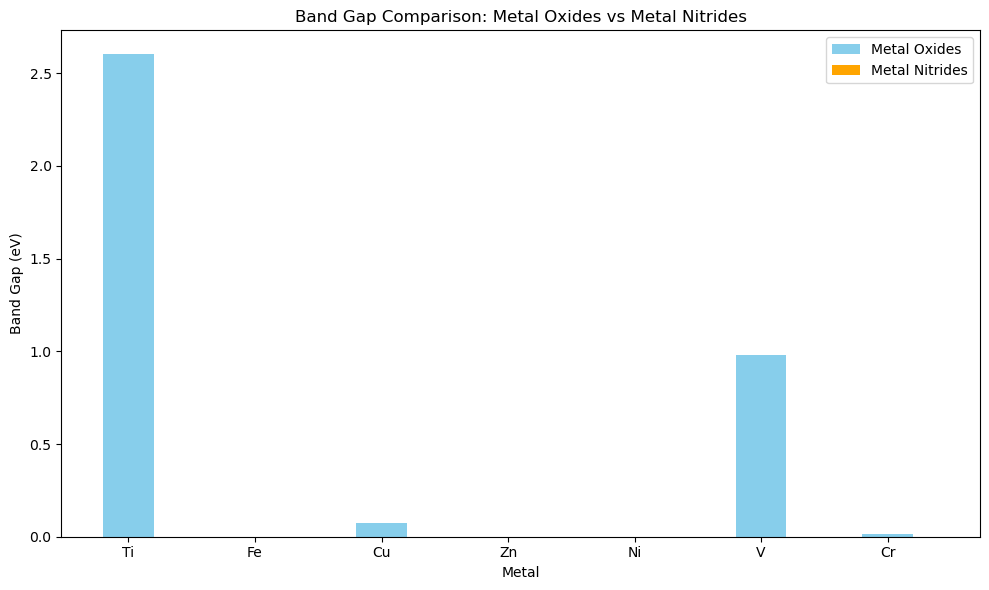

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mp_api.client import MPRester
import warnings
warnings.filterwarnings('ignore')

# API key for Materials Project
API_KEY = "Enter API Key Here"

mpr = MPRester(API_KEY)

def get_band_gaps_for_metal_compounds(metal):
    oxide_results = mpr.materials.summary.search(
        formula=f"{metal}O2",  # Metal oxide formula (e.g., TiO2)
        fields=["material_id", "formula_pretty", "band_gap"]
    )

    nitride_results = mpr.materials.summary.search(
        formula=f"{metal}N",
        fields=["material_id", "formula_pretty", "band_gap"]
    )

    oxide_band_gaps = [(r.formula_pretty, r.band_gap) for r in oxide_results if r.band_gap is not None]
    nitride_band_gaps = [(r.formula_pretty, r.band_gap) for r in nitride_results if r.band_gap is not None]

    return oxide_band_gaps, nitride_band_gaps

def plot_band_gap_comparison(oxides_band_gaps, nitrides_band_gaps):
    metals = [metal for metal, _ in oxides_band_gaps]
    oxides_band = [band_gap for _, band_gap in oxides_band_gaps]
    nitrides_band = [band_gap for _, band_gap in nitrides_band_gaps]

    x = range(len(metals))

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x, oxides_band, width=0.4, label='Metal Oxides', align='center', color='skyblue')
    ax.bar(x, nitrides_band, width=0.4, label='Metal Nitrides', align='edge', color='orange')

    ax.set_xlabel('Metal')
    ax.set_ylabel('Band Gap (eV)')
    ax.set_title('Band Gap Comparison: Metal Oxides vs Metal Nitrides')
    ax.set_xticks(x)
    ax.set_xticklabels(metals)
    ax.legend()

    plt.tight_layout()
    plt.show()

def main():
    metals = ['Ti', 'Fe', 'Cu', 'Zn', 'Ni', 'V', 'Cr']

    all_oxide_band_gaps = []
    all_nitride_band_gaps = []

    for metal in metals:
        oxide_band_gaps, nitride_band_gaps = get_band_gaps_for_metal_compounds(metal)

        if oxide_band_gaps and nitride_band_gaps:
            all_oxide_band_gaps.append((metal, oxide_band_gaps[0][1]))
            all_nitride_band_gaps.append((metal, nitride_band_gaps[0][1]))

    plot_band_gap_comparison(all_oxide_band_gaps, all_nitride_band_gaps)

if __name__ == "__main__":
    main()
